In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import openpyxl
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage

#Show mols in dataframes
from rdkit.Chem import PandasTools
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage
from IPython.core.display import HTML
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import DataStructs
import os
import sys
from scipy.spatial.distance import pdist, squareform

In [2]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
processed_dir = TOP +'data/processed/'
interim_dir = TOP + 'data/interim/'
external_dir = TOP + 'data/external/'
figures_dir = TOP + 'reports/figures/'


In [3]:
df = pd.read_excel(interim_dir+'categorisatons_wscreening_constraints_221122.xlsx', sheet_name = 'All data')




In [6]:
df.columns.tolist()[-15:]

['lvl2_analogues',
 'lvl2_Dist',
 'final_centroid',
 'final_dist',
 'gt65_picks',
 'diverse_picks',
 'screenable',
 'group',
 'group_str',
 'screenable_centroid',
 'screenable_centroid_id',
 'screenable_centroid_id2',
 'screening_analogues',
 'screening_dist',
 'MaxMin_selection_picks']

In [7]:
df.head()

,Unnamed: 0,dtxsid,PREFERRED_NAME,CASRN,INCHIKEY,IUPAC_NAME,smiles,INCHI_STRING,MOLECULAR_FORMULA,AVERAGE_MASS,...,diverse_picks,screenable,group,group_str,screenable_centroid,screenable_centroid_id,screenable_centroid_id2,screening_analogues,screening_dist,MaxMin_selection_picks
0,0,DTXSID4063036,1-Nonyne,3452-09-3,OSSQSXOTMIGBCF-UHFFFAOYSA-N,Non-1-yne,CCCCCCCC#C,"InChI=1S/C9H16/c1-3-5-7-9-8-6-4-2/h1H,4-9H2,2H3",C9H16,124.227,...,1,1,"('Acetylides', nan)","('Acetylides', nan)",centroid,DTXSID4063036,DTXSID4063036,DTXSID4063036,0.000000,1.0
1,1,DTXSID30870753,1-Hexyne,693-02-7,CGHIBGNXEGJPQZ-UHFFFAOYSA-N,Hex-1-yne,CCCCC#C,"InChI=1S/C6H10/c1-3-5-6-4-2/h1H,4-6H2,2H3",C6H10,82.146,...,0,1,"('Acetylides', nan)","('Acetylides', nan)",NaN,NaN,DTXSID4063036,DTXSID30870753,0.434783,0.0
2,2,DTXSID7062374,"1,8-Nonadiyne",2396-65-8,DMOVPHYFYSASTC-UHFFFAOYSA-N,"Nona-1,8-diyne",C#CCCCCCC#C,"InChI=1S/C9H12/c1-3-5-7-9-8-6-4-2/h1-2H,5-9H2",C9H12,120.195,...,0,1,"('Acetylides', nan)","('Acetylides', nan)",NaN,NaN,DTXSID4063036,DTXSID7062374,0.409091,0.0
3,3,DTXSID9061097,1-Pentadecyne,765-13-9,DONJGKADZJEXRJ-UHFFFAOYSA-N,Pentadec-1-yne,CCCCCCCCCCCCCC#C,InChI=1S/C15H28/c1-3-5-7-9-11-13-15-14-12-10-8...,C15H28,208.389,...,0,1,"('Acetylides', nan)","('Acetylides', nan)",NaN,NaN,DTXSID4063036,DTXSID9061097,0.045455,0.0
4,4,DTXSID1061233,"1,7-Octadiyne",871-84-1,DSOJWVLXZNRKCS-UHFFFAOYSA-N,"Octa-1,7-diyne",C#CCCCCC#C,"InChI=1S/C8H10/c1-3-5-7-8-6-4-2/h1-2H,5-8H2",C8H10,106.168,...,0,1,"('Acetylides', nan)","('Acetylides', nan)",NaN,NaN,DTXSID4063036,DTXSID1061233,0.500000,0.0


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

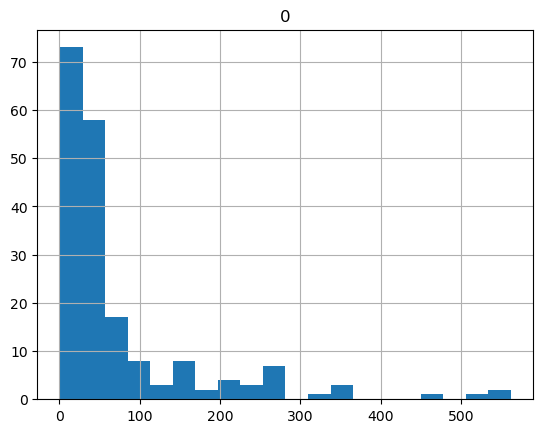

In [34]:
#for i, group in df.groupby('group_str'):
df.groupby('group_str').size().sort_values(ascending = False).reset_index().hist(bins = 20)

In [17]:
df.groupby('group_str').size().sort_values(ascending = False).reset_index().describe()

,0
count,191.000000
mean,74.591623
std,100.956847
min,1.000000
25%,18.000000
50%,40.000000
75%,73.000000
max,562.000000


In [30]:
df.groupby('group_str').size().sort_values(ascending = False).reset_index()

,group_str,0
0,"('Benzene and substituted derivatives', 2.0)",562
1,"('Benzene and substituted derivatives', 8.0)",553
2,"('Prenol lipids', 2.0)",509
3,"('Fatty Acyls', 1.0)",469
4,"('Carboxylic acids and derivatives', 1.0)",362
...,...,...
186,"('Benzene and substituted derivatives', nan)",2
187,"('Organic nitrogen compounds', nan)",2
188,"('Allenes', nan)",2
189,"('Pyridines and derivatives', nan)",1


In [29]:
df2 = df.groupby('group_str').size().sort_values(ascending = False).reset_index()
df2.columns = ['group_str', 'size']

In [84]:
df2

,group_str,size
0,"('Benzene and substituted derivatives', 2.0)",562
1,"('Benzene and substituted derivatives', 8.0)",553
2,"('Prenol lipids', 2.0)",509
3,"('Fatty Acyls', 1.0)",469
4,"('Carboxylic acids and derivatives', 1.0)",362
...,...,...
186,"('Benzene and substituted derivatives', nan)",2
187,"('Organic nitrogen compounds', nan)",2
188,"('Allenes', nan)",2
189,"('Pyridines and derivatives', nan)",1


In [80]:
mydict = {}
mydict['between20-70'] = df2.query('70 >= size > 20')['group_str'].tolist()
mydict['between70-150'] = df2.query('150 >= size > 70')['group_str'].tolist()
mydict['between150-300'] = df2.query('300 >= size > 150')['group_str'].tolist()
mydict['between300-600'] = df2.query('600 >= size > 300')['group_str'].tolist()
mydict['lessthan20'] = df2.query('20 >= size')['group_str'].tolist()

In [81]:
mydict.keys()

dict_keys(['between20-70', 'between70-150', 'between150-300', 'between300-600', 'lessthan20'])

In [82]:
{k:len(v) for k,v in mydict.items()}

{'between20-70': 83,
 'between70-150': 21,
 'between150-300': 20,
 'between300-600': 8,
 'lessthan20': 59}

In [88]:
83+21+20+8+59

191

In [46]:
df[['dtxsid','group_str','diverse_picks',
 'screenable',
 'group',
 'group_str',
 'screenable_centroid',
 'screenable_centroid_id',
 'screenable_centroid_id2',
 'screening_analogues',
 'screening_dist',
 'MaxMin_selection_picks']]

,dtxsid,group_str,diverse_picks,screenable,group,group_str,screenable_centroid,screenable_centroid_id,screenable_centroid_id2,screening_analogues,screening_dist,MaxMin_selection_picks
0,DTXSID4063036,"('Acetylides', nan)",1,1,"('Acetylides', nan)","('Acetylides', nan)",centroid,DTXSID4063036,DTXSID4063036,DTXSID4063036,0.000000,1.0
1,DTXSID30870753,"('Acetylides', nan)",0,1,"('Acetylides', nan)","('Acetylides', nan)",NaN,NaN,DTXSID4063036,DTXSID30870753,0.434783,0.0
2,DTXSID7062374,"('Acetylides', nan)",0,1,"('Acetylides', nan)","('Acetylides', nan)",NaN,NaN,DTXSID4063036,DTXSID7062374,0.409091,0.0
3,DTXSID9061097,"('Acetylides', nan)",0,1,"('Acetylides', nan)","('Acetylides', nan)",NaN,NaN,DTXSID4063036,DTXSID9061097,0.045455,0.0
4,DTXSID1061233,"('Acetylides', nan)",0,1,"('Acetylides', nan)","('Acetylides', nan)",NaN,NaN,DTXSID4063036,DTXSID1061233,0.500000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14242,DTXSID7070391,"('Triphenyl compounds', nan)",0,1,"('Triphenyl compounds', nan)","('Triphenyl compounds', nan)",NaN,NaN,DTXSID0060149,DTXSID7070391,0.878049,0.0
14243,DTXSID70889405,"('Triphenyl compounds', nan)",0,1,"('Triphenyl compounds', nan)","('Triphenyl compounds', nan)",NaN,NaN,DTXSID0060149,DTXSID70889405,0.920455,1.0
14244,DTXSID90886794,"('Triphenyl compounds', nan)",0,1,"('Triphenyl compounds', nan)","('Triphenyl compounds', nan)",NaN,NaN,DTXSID0060149,DTXSID90886794,0.910112,0.0
14245,DTXSID3073052,"('Triphenyl compounds', nan)",0,1,"('Triphenyl compounds', nan)","('Triphenyl compounds', nan)",NaN,NaN,DTXSID0060149,DTXSID3073052,0.849057,0.0


In [49]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df3 = df.set_index('dtxsid')

In [89]:
mydict2 = {e:k for k, v in mydict.items() for e in v}

In [90]:
df3['category_size'] =   df3['group_str'].replace(mydict2)
                
        
        
#    

In [91]:
df3['category_size'].unique()

array(['between20-70', 'lessthan20', 'between150-300', 'between300-600',
       'between70-150'], dtype=object)

In [98]:
mylst = []
for i, row in df3.iterrows():
    if (row['screenable'] ==1) & (row['MaxMin_selection_picks'] ==1) & (row['category_size'] in ['between20-70', 'between70-150', 'between150-300']):
        mylst.append(i)

In [99]:
len(mylst)

336

In [108]:
df4 = df3.reset_index()

In [109]:
df4['final_picks'] = df4['dtxsid'].apply(lambda x: 1 if x in mylst else np.nan) 

In [110]:
df4['final_picks'].value_counts()

1.0    336
Name: final_picks, dtype: int64

In [111]:
df4

,dtxsid,PREFERRED_NAME,CASRN,INCHIKEY,IUPAC_NAME,smiles,INCHI_STRING,MOLECULAR_FORMULA,AVERAGE_MASS,MONOISOTOPIC_MASS,...,group,group_str,screenable_centroid,screenable_centroid_id,screenable_centroid_id2,screening_analogues,screening_dist,MaxMin_selection_picks,category_size,final_picks
0,DTXSID4063036,1-Nonyne,3452-09-3,OSSQSXOTMIGBCF-UHFFFAOYSA-N,Non-1-yne,CCCCCCCC#C,"InChI=1S/C9H16/c1-3-5-7-9-8-6-4-2/h1H,4-9H2,2H3",C9H16,124.227,124.125201,...,"('Acetylides', nan)","('Acetylides', nan)",centroid,DTXSID4063036,DTXSID4063036,DTXSID4063036,0.000000,1.0,between20-70,1.0
1,DTXSID30870753,1-Hexyne,693-02-7,CGHIBGNXEGJPQZ-UHFFFAOYSA-N,Hex-1-yne,CCCCC#C,"InChI=1S/C6H10/c1-3-5-6-4-2/h1H,4-6H2,2H3",C6H10,82.146,82.078250,...,"('Acetylides', nan)","('Acetylides', nan)",NaN,NaN,DTXSID4063036,DTXSID30870753,0.434783,0.0,between20-70,NaN
2,DTXSID7062374,"1,8-Nonadiyne",2396-65-8,DMOVPHYFYSASTC-UHFFFAOYSA-N,"Nona-1,8-diyne",C#CCCCCCC#C,"InChI=1S/C9H12/c1-3-5-7-9-8-6-4-2/h1-2H,5-9H2",C9H12,120.195,120.093900,...,"('Acetylides', nan)","('Acetylides', nan)",NaN,NaN,DTXSID4063036,DTXSID7062374,0.409091,0.0,between20-70,NaN
3,DTXSID9061097,1-Pentadecyne,765-13-9,DONJGKADZJEXRJ-UHFFFAOYSA-N,Pentadec-1-yne,CCCCCCCCCCCCCC#C,InChI=1S/C15H28/c1-3-5-7-9-11-13-15-14-12-10-8...,C15H28,208.389,208.219101,...,"('Acetylides', nan)","('Acetylides', nan)",NaN,NaN,DTXSID4063036,DTXSID9061097,0.045455,0.0,between20-70,NaN
4,DTXSID1061233,"1,7-Octadiyne",871-84-1,DSOJWVLXZNRKCS-UHFFFAOYSA-N,"Octa-1,7-diyne",C#CCCCCC#C,"InChI=1S/C8H10/c1-3-5-7-8-6-4-2/h1-2H,5-8H2",C8H10,106.168,106.078250,...,"('Acetylides', nan)","('Acetylides', nan)",NaN,NaN,DTXSID4063036,DTXSID1061233,0.500000,0.0,between20-70,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14242,DTXSID7070391,"1,1'-((Phenylmethylene)bis((2-methyl-4,1-pheny...",66085-68-5,WMIMXCPQTYMGDN-UHFFFAOYSA-N,"1,1'-{(Phenylmethylene)bis[(2-methyl-4,1-pheny...",CC1=CC(=CC=C1N=NC1=C2C=CC=CC2=CC=C1O)C(C1=CC=C...,InChI=1S/C41H32N4O2/c1-26-24-31(16-20-35(26)42...,C41H32N4O2,612.733,612.252526,...,"('Triphenyl compounds', nan)","('Triphenyl compounds', nan)",NaN,NaN,DTXSID0060149,DTXSID7070391,0.878049,0.0,between20-70,NaN
14243,DTXSID70889405,"Oxirane, 2,2',2''-[methylidynetris(phenyleneox...",106253-69-4,WUULWDSQZQBRKW-UHFFFAOYSA-N,"3,3'-(2-Methyl-1,3-phenylene)bis(5-{[4-(bis{4-...",CC1=C(C=CC=C1N1CC(COC2=CC=C(C=C2)C(C2=CC=C(OCC...,InChI=1/C65H62N2O14/c1-41-60(66-29-54(80-64(66...,C65H62N2O14,1095.211,1094.420105,...,"('Triphenyl compounds', nan)","('Triphenyl compounds', nan)",NaN,NaN,DTXSID0060149,DTXSID70889405,0.920455,1.0,between20-70,1.0
14244,DTXSID90886794,"3H-Pyrazol-3-one, 4,4'-[(phenylmethylene)bis[(...",66085-69-6,WXNBMYJCPCEWND-UHFFFAOYSA-N,"4,4'-{(Phenylmethylene)bis[(2-methyl-4,1-pheny...",CC1=NN(C(=O)C1N=NC1=CC=C(C=C1C)C(C1=CC=CC=C1)C...,InChI=1/C41H36N8O2/c1-26-24-31(20-22-35(26)42-...,C41H36N8O2,672.793,672.296122,...,"('Triphenyl compounds', nan)","('Triphenyl compounds', nan)",NaN,NaN,DTXSID0060149,DTXSID90886794,0.910112,0.0,between20-70,NaN
14245,DTXSID3073052,"Phenol, 4,4'-[1-[4-[1-(4-hydroxyphenyl)-1-meth...",110726-28-8,WXYSZTISEJBRHW-UHFFFAOYSA-N,"4,4'-(1-{4-[2-(4-Hydroxyphenyl)propan-2-yl]phe...",CC(C)(C1=CC=C(O)C=C1)C1=CC=C(C=C1)C(C)(C1=CC=C...,"InChI=1S/C29H28O3/c1-28(2,21-8-14-25(30)15-9-2...",C29H28O3,424.540,424.203845,...,"('Triphenyl compounds', nan)","('Triphenyl compounds', nan)",NaN,NaN,DTXSID0060149,DTXSID3073052,0.849057,0.0,between20-70,NaN


In [112]:
writer = pd.ExcelWriter(interim_dir+'categorisatons_wscreening_constraints_final_picks_261122.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.

df4.to_excel(writer, sheet_name = 'All data')


writer.save()

In [120]:
df4.columns[-20:]

Index(['cluster_d', 'lvl2_centroid', 'lvl2_centroid2', 'lvl2_analogues',
       'lvl2_Dist', 'final_centroid', 'final_dist', 'gt65_picks',
       'diverse_picks', 'screenable', 'group', 'group_str',
       'screenable_centroid', 'screenable_centroid_id',
       'screenable_centroid_id2', 'screening_analogues', 'screening_dist',
       'MaxMin_selection_picks', 'category_size', 'final_picks'],
      dtype='object')

In [122]:
df4[df4['diverse_picks'] ==1]['dtxsid']

0         DTXSID4063036
8         DTXSID6026379
13       DTXSID30862951
19       DTXSID70871320
26        DTXSID9062647
              ...      
14218    DTXSID60885198
14220     DTXSID5022439
14221     DTXSID0052332
14223     DTXSID3052511
14234     DTXSID0063492
Name: dtxsid, Length: 467, dtype: object

In [129]:
mydict3 = {'diverse_picks_unconstrained' : set(df4[df4['diverse_picks'] ==1]['dtxsid'].tolist()), 'MaxMin_picks_constrained' : set(df4[df4['MaxMin_selection_picks'] ==1]['dtxsid'].tolist()), 'final_picks': set(df4[df4['final_picks']==1]['dtxsid'].tolist()), 'screenable' : set(df4[df4['screenable'] ==1]['dtxsid'].tolist())} 

In [130]:
mydict3.keys()

dict_keys(['diverse_picks_unconstrained', 'MaxMin_picks_constrained', 'final_picks', 'screenable'])

In [131]:
from venn import venn

<AxesSubplot:>

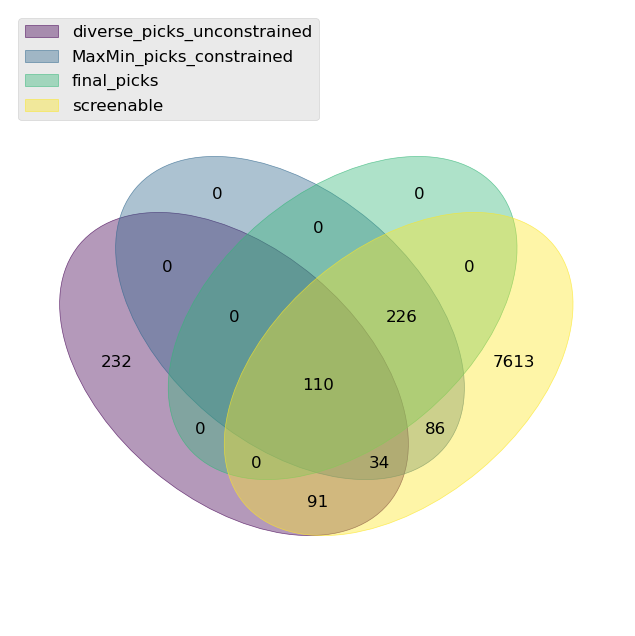

In [132]:
plt.style.use('ggplot')
f, ax = plt.subplots(figsize=(18, 8))
#plt.figure(figsize=(18, 8))
venn(mydict3, cmap="viridis", fontsize=12, legend_loc="upper left",ax = ax )
